<a href="https://colab.research.google.com/github/Hydrix/DSND_Term2/blob/master/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import os
import pandas as pd
import shutil

import shutil
import os
import numpy as np
import imutils
import cv2
import scipy.spatial as sp
from skimage.measure import label, regionprops
import glob
import skimage.filters as ft

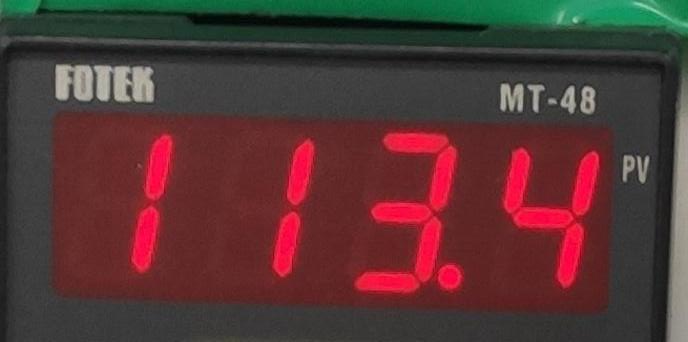

In [109]:
test_img = cv2.imread("/content/im-cropped.jpg")
cv2_imshow(test_img)

In [110]:
def filter_red(img):
    _,_,R = cv2.split(img)
    print("R")
    print(R)
    ret,thresh_red = cv2.threshold(R, 220 ,255,cv2.THRESH_BINARY)
    new_img = np.zeros_like(img)
    for i in range(0,3):
        new_img[:,:,i] = thresh_red
    cv2_imshow(new_img)
    return new_img

R
[[ 64  50  44 ...  15  12  10]
 [ 62  48  42 ...  15  12  10]
 [ 61  49  43 ...  15  13  11]
 ...
 [ 33  33  33 ... 154 156 157]
 [ 33  33  33 ... 154 155 157]
 [ 33  33  33 ... 153 155 157]]


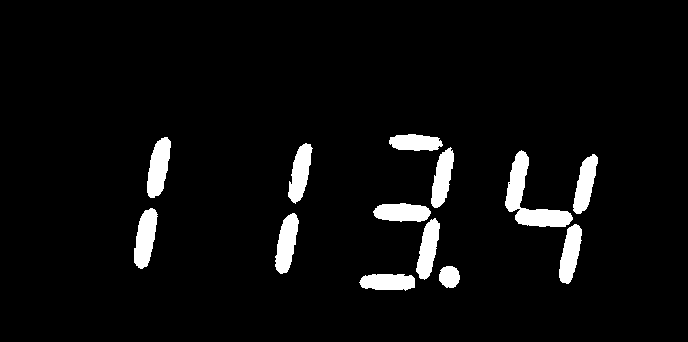

In [111]:
filtered = filter_red(test_img)

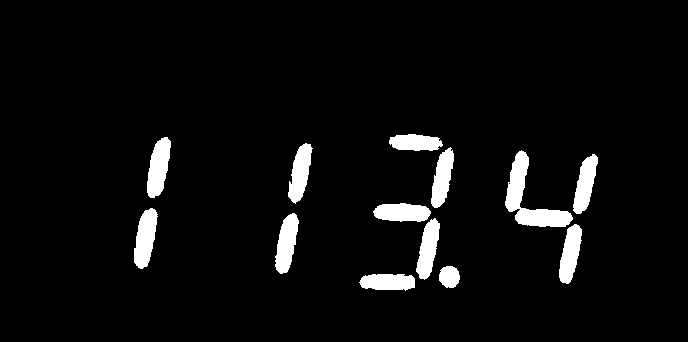

In [112]:
gray = cv2.cvtColor(filtered, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [133]:
def blurIteration(image, iterations = 3, 
                  blurKernel = (5,5), 
                  minThresh = 150, 
                  maxThresh = 255, 
                  threshType= cv2.THRESH_BINARY):
  for n in range (iterations):
    blur = cv2.blur(image, blurKernel)
    ok, image = cv2.threshold(blur, minThresh, maxThresh, threshType)

  return image


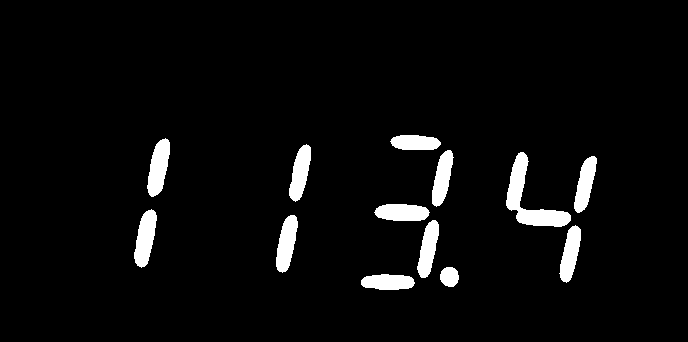

In [137]:
img_looped = blurIteration(gray, iterations = 2)
cv2_imshow(img_looped)

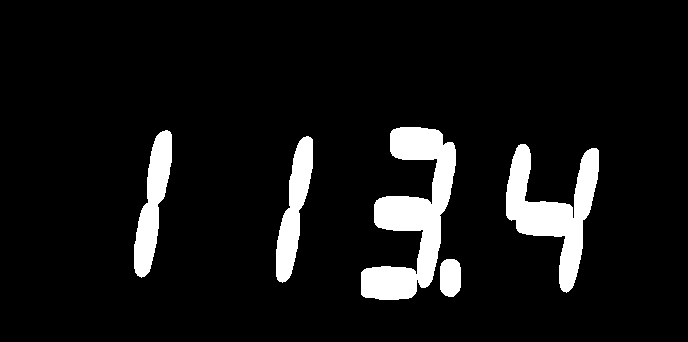

In [141]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,10))
result = cv2.dilate(img_looped.copy(), kernel, iterations = 2)
# result = cv2.erode(result, kernel, iterations = 3)
cv2_imshow(result)

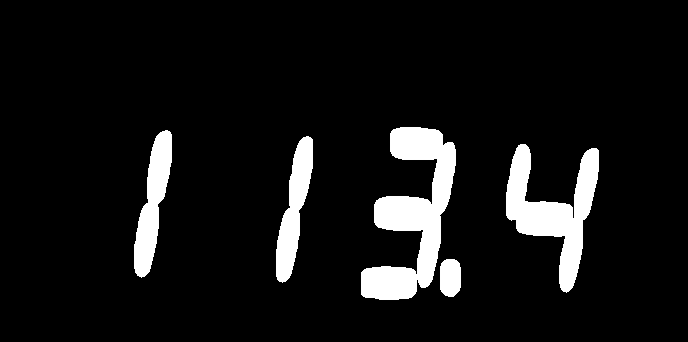

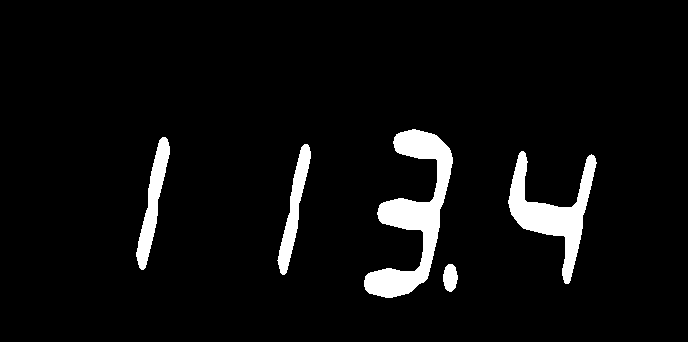

In [147]:
im2 = cv2.bilateralFilter(result, 9, 75, 75)
cv2_imshow(im2)
im3 = blurIteration(im2, iterations = 10)
cv2_imshow(im3)

In [139]:
contours, hierarchy = cv2.findContours(image=result, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

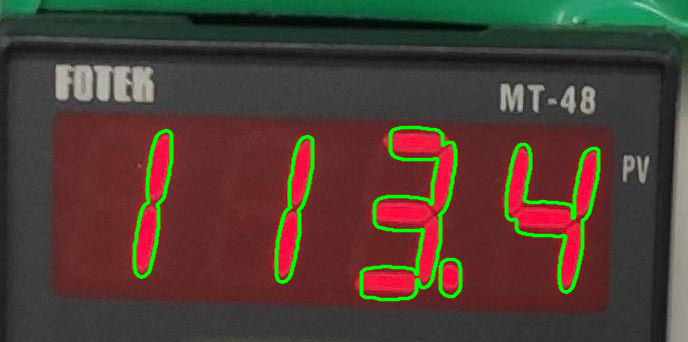

In [140]:
image_copy = test_img.copy()
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
cv2_imshow(image_copy)

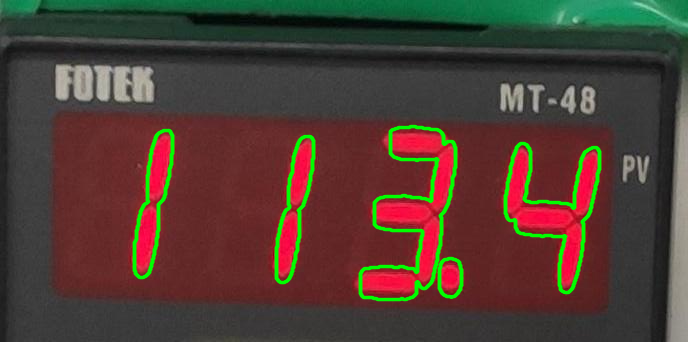

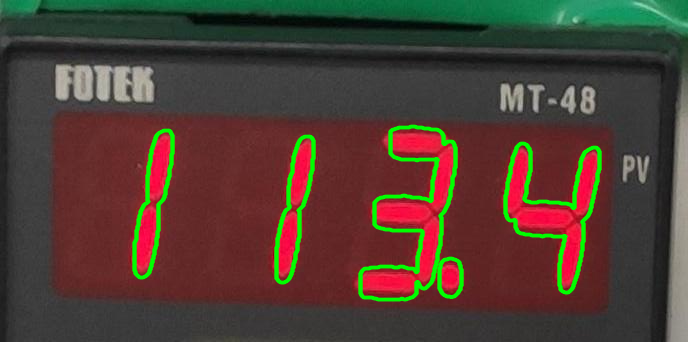

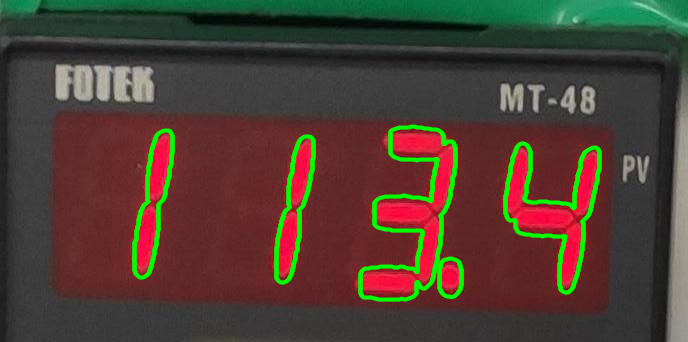

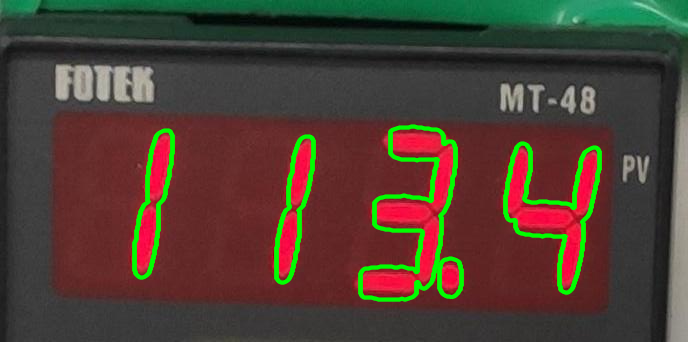

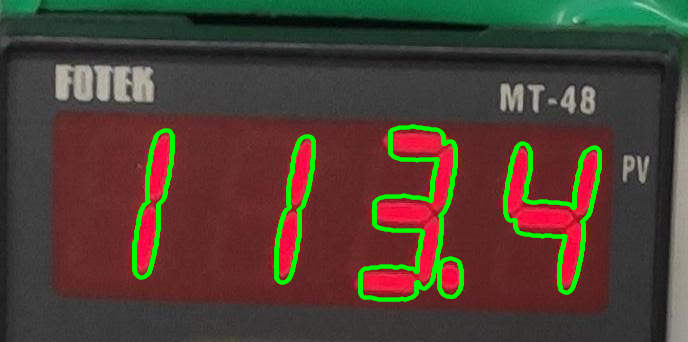

In [105]:
cop = test_img.copy()
#print(len(cnts))
#c = cnts[4]
#peri = cv2.arcLength(c, True)
#approx = cv2.approxPolyDP(c, 0.2 * peri, True)
#cv2.drawContours(image=cop, contours=approx, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
#cv2_imshow(cop)

for c in cnts:
  peri = cv2.arcLength(c, True)
  approx = cv2.approxPolyDP(c, 0.02 * peri, True)
  cv2.drawContours(image=cop, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
  cv2_imshow(cop)
  if len(approx) == 4:
      Cnt_bis = approx
      break

In [40]:
Cnt_bis = Cnt_bis.reshape(4, 2)

NameError: ignored

In [ ]:
Cnt_bis = sort_pts_clockwise(Cnt_bis)
src_pts = Cnt_bis.copy()
src_pts = src_pts.astype(np.float32)

dst_pts = np.array([[0, 0], [400, 0], [400, 100], [0, 100]], dtype=np.float32)
dst_pts = dst_pts.astype(np.float32)

persp = cv2.getPerspectiveTransform(src_pts, dst_pts)
warped = cv2.warpPerspective(inverted, persp, (400, 100))

NameError: ignored

In [ ]:
cv2_imshow(warped)

NameError: ignored

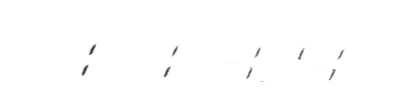

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
result = cv2.dilate(warped.copy(), None, iterations = 3)
cv2_imshow(result)

In [ ]:
kernel

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)